In [1358]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
import seaborn as sns

print('Esperamos trabalhar no diretório')
print(os.getcwd())



Esperamos trabalhar no diretório
c:\Users\renat\OneDrive\Área de Trabalho\projeto 2 cdados\22-2a-cd-p2-grupo_bexcamrefe


INTRODUÇÃO
Explicar objetivo do trabalho
Apresentar banco de dados
Definição de Target e Feature

Prever: A probabilidade de um voo americano em Janeiro vai ser cancelado.
Pergunta: Qual a probabilidade do meu voo ser cancelado de acordo com a sua cia aéra?

MINERAÇÃO DE DADOS
Limpeza do dataset

In [1359]:
# FILTRANDO APENAS DADOS INTERESSANTES
dados_2019 = pd.read_csv('Jan_2019_ontime.csv', sep=',')
# manter: OP_CARRIER, ORIGIN, DESTINATION, CANCELLED, DIVERTED, DISTANCE
Novos_dados_2019 = dados_2019.loc[:,['OP_CARRIER','ORIGIN', 'DEST','CANCELLED','DISTANCE']]
Novos_dados_2019['Ano'] = 2019
Novos_dados_2019.head(5)

,OP_CARRIER,ORIGIN,DEST,CANCELLED,DISTANCE,Ano
0,9E,GNV,ATL,0.0,300.0,2019
1,9E,MSP,CVG,0.0,596.0,2019
2,9E,DTW,CVG,0.0,229.0,2019
3,9E,TLH,ATL,0.0,223.0,2019
4,9E,ATL,FSM,0.0,579.0,2019


In [1360]:
dados_2020 = pd.read_csv('Jan_2020_ontime.csv')
# manter: OP_CARRIER, ORIGIN, DESTINATION, CANCELLED, DIVERTED, DISTANCE
Novos_dados_2020 = dados_2020.loc[:,['OP_CARRIER','ORIGIN', 'DEST','CANCELLED','DISTANCE']]
Novos_dados_2020['Ano'] = 2020
Novos_dados_2020.head(5)

,OP_CARRIER,ORIGIN,DEST,CANCELLED,DISTANCE,Ano
0,EV,ORD,GRB,0.0,174.0,2020
1,EV,TUL,ORD,0.0,585.0,2020
2,EV,EWR,TYS,0.0,631.0,2020
3,EV,BTR,IAH,0.0,253.0,2020
4,EV,RIC,IAH,0.0,1157.0,2020


In [1361]:
General_base  = pd.merge(Novos_dados_2020 , Novos_dados_2019, how = 'outer') # JUNTANDO AS DUAS BASES DE DADOS

General_base ['OP_CARRIER'] = General_base ['OP_CARRIER'].astype('category')
General_base ['ORIGIN'] = General_base ['ORIGIN'].astype('category')
General_base ['DEST'] = General_base ['DEST'].astype('category')
General_base ['CANCELLED'] = General_base ['CANCELLED'].astype('category')



In [1362]:
Comparador = pd.read_csv('Pasta1.csv')
print(Comparador)

   OP_CARRIER                Airline Name
0          Dl             Delta Air Lines
1          AA     American Airlines Cargo
2          WN          Southwest Airlines
3          OO            SkyWest Airlines
4          UA       United Airlines Cargo
5          YX            Midwest Airlines
6          MQ                   Envoy air
7          B6                     JetBlue
8          9E                    Endeavor
9          AS             Alaska Airlines
10         YV               Mesa Airlines
11         NK             Spirit Airlines
12         EV  Atlatic Southeast Airlines
13         F9             FRONTIER FLIGHT
14         G4               Allegiant Air
15         HA           Hawaiian Airlines
16         OH     Comair Delta Connection


In [1363]:
General_base ['OP_CARRIER'].cat.categories = [' Endeavor','American Airlines Cargo','Alaska Airlines','JetBlue','Delta Air Lines','Atlatic Southeast Airlines','Frontier Flight','Allegiant Air','Hawaiian Airlines','Envoy Air','Spirit Airlines','Comair Delta Connection','SkyWest Airlines','United Airlines Cargo','Southwest Airlines','Mesa Airlines','Midwest Airlines']


In [1364]:
Dados_gerais_00 = General_base 
Dados_gerais = Dados_gerais_00.sample(frac = 0.01)
# Creating dataframe with
# rest of the 50% values
rest_Dados_gerais = Dados_gerais_00.drop(Dados_gerais.index)


In [1365]:
Dados_gerais.dropna()

,OP_CARRIER,ORIGIN,DEST,CANCELLED,DISTANCE,Ano
180229,Midwest Airlines,CLT,CMH,0.0,347.0,2020
1133625,Allegiant Air,SFB,SWF,0.0,965.0,2019
1134692,American Airlines Cargo,MKE,DFW,0.0,853.0,2019
531410,Alaska Airlines,OAK,KOA,0.0,2378.0,2020
1046952,Southwest Airlines,SMF,SNA,0.0,404.0,2019
...,...,...,...,...,...,...
1184648,Southwest Airlines,MDW,OAK,1.0,1844.0,2019
30186,Southwest Airlines,DAL,CLT,0.0,926.0,2020
259823,Spirit Airlines,MCO,LAS,0.0,2039.0,2020
324737,Delta Air Lines,SDF,ATL,0.0,321.0,2020


In [1366]:
# CHECANDO SE TEMOS VALORES NULOS
Cancelados = Dados_gerais[Dados_gerais['CANCELLED'] == 1.0]
Nao_cancelados = Dados_gerais[Dados_gerais['CANCELLED'] == 0.0]
#Voo_cancelados = Treinamento.loc[Cancelados,:]
#print(len(Voo_cancelados))
print(Cancelados.isnull().sum())
print(len(Cancelados))
print(Nao_cancelados.isnull().sum())
print(len(Nao_cancelados))
# --> está certo, resultados esperados pois voos cancelados não atrasam e não cancelados podem ainda assim atrasar.


OP_CARRIER    0
ORIGIN        0
DEST          0
CANCELLED     0
DISTANCE      0
Ano           0
dtype: int64
274
OP_CARRIER    0
ORIGIN        0
DEST          0
CANCELLED     0
DISTANCE      0
Ano           0
dtype: int64
11639


,count,mean,std,min,25%,50%,75%,max
CANCELLED,,,,,,,,
0.0,11639.0,811.806,602.487,31.0,371.0,646.0,1050.00,5095.0
1.0,274.0,649.960,498.485,67.0,296.5,500.0,865.25,2704.0


,count,mean,std,min,25%,50%,75%,max
CANCELLED,,,,,,,,
True,274.0,649.96,498.485,67.0,296.5,500.0,865.25,2704.0


,count,mean,std,min,25%,50%,75%,max
CANCELLED,,,,,,,,
False,11639.0,811.806,602.487,31.0,371.0,646.0,1050.0,5095.0


Text(0, 0.5, 'Frequência absoluta')

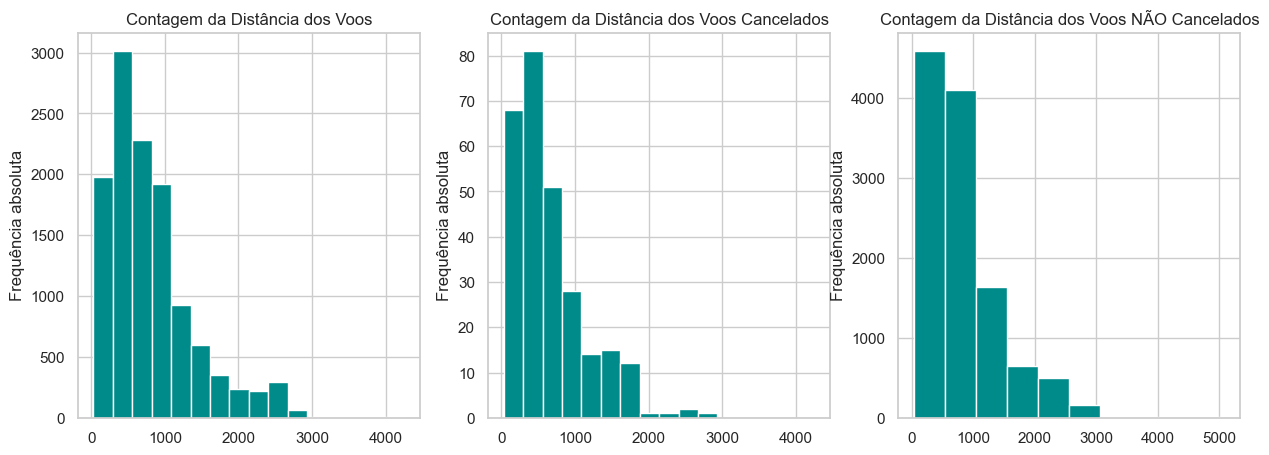

In [1367]:
# Nosso Target --> qualitativo (SIM/NÃO --> 1.0/0.0 --> CANCELADO/NÃO CANCELADO), por isso temos que 
# Estudar as relações com base em gráficos de QualitativasXQuantitativas e QualitativasXQualitativas

# CANCELADOS X DISTANCIA --> único caso qualixquant do nosso df
display(Dados_gerais.groupby(by= [Dados_gerais.CANCELLED]).DISTANCE.describe().round(3))
display(Cancelados.groupby(by= [Cancelados.CANCELLED == 1.0]).DISTANCE.describe().round(3))
display(Nao_cancelados.groupby(by= [Nao_cancelados.CANCELLED == 1.0]).DISTANCE.describe().round(3))

amplitude = Dados_gerais.DISTANCE.max()-Dados_gerais.DISTANCE.min()
amplitude_faixa= amplitude/ 10
faixa= np.arange(30, 5100.0, amplitude_faixa )

amplitude_cancelados = Cancelados.DISTANCE.max()-Cancelados.DISTANCE.min()
amplitude_faixa_cancelados = amplitude_cancelados / 10
faixa_canc = np.arange(30, 4480.0, amplitude_faixa_cancelados )

amplitude_nao_cancelados = Nao_cancelados.DISTANCE.max()-Nao_cancelados.DISTANCE.min()
amplitude_faixa_nao_cancelados = amplitude_nao_cancelados / 10
faixa_nao_canc = np.arange(30, 5100.0, amplitude_faixa_nao_cancelados )


plt.figure(figsize=(15, 5))
# GRÁFICO DA DISTÂNCIA POR VOO
plt.subplot(131)
plt.hist(Dados_gerais.DISTANCE, bins=faixa_canc, color='darkcyan', edgecolor='white')
plt.title('Contagem da Distância dos Voos')
plt.ylabel('Frequência absoluta')
# GRÁFICO CANCELADOS
plt.subplot(132)
plt.hist(Cancelados.DISTANCE, bins=faixa_canc, color='darkcyan', edgecolor='white')
plt.title('Contagem da Distância dos Voos Cancelados')
plt.ylabel('Frequência absoluta')
# GRÁFICO NÃO CANCELADOS
plt.subplot(133)
plt.hist(Nao_cancelados.DISTANCE, bins=faixa_nao_canc, color='darkcyan', edgecolor='white')
plt.title('Contagem da Distância dos Voos NÃO Cancelados')
plt.ylabel('Frequência absoluta')



CANCELLED,0.0,1.0
OP_CARRIER,,
Envoy Air,91.7,8.3
Atlatic Southeast Airlines,95.3,4.7
Mesa Airlines,96.9,3.1
SkyWest Airlines,96.9,3.1
Southwest Airlines,97.0,3.0
JetBlue,97.5,2.5
Midwest Airlines,97.5,2.5
Comair Delta Connection,97.6,2.4
All,97.7,2.3


None


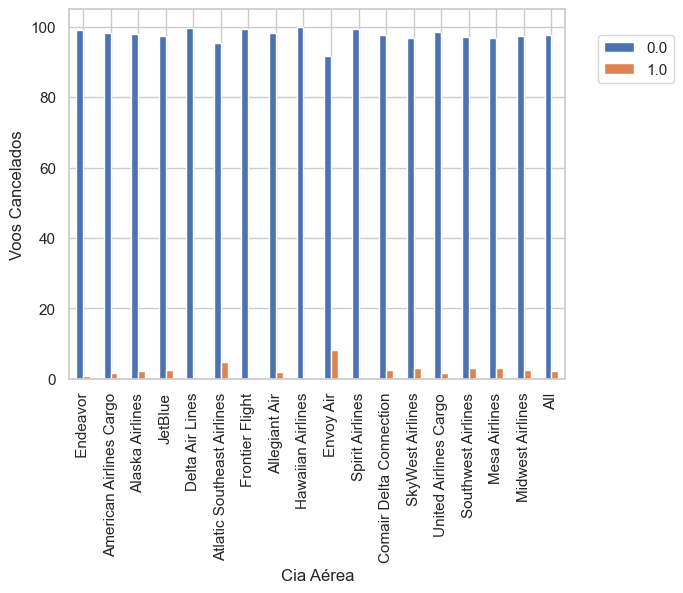

CANCELLED,0.0,1.0
DEST,,
TVC,50.0,50.0
MKG,50.0,50.0
LSE,50.0,50.0
SPS,66.7,33.3
MQT,66.7,33.3
ACT,66.7,33.3
MGM,71.4,28.6
MLI,75.0,25.0
BGR,75.0,25.0


None


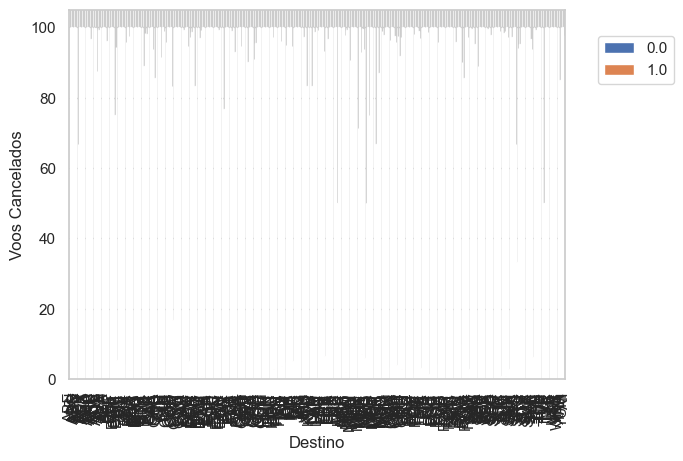

CANCELLED,0.0,1.0
ORIGIN,,
CMX,0.0,100.0
PSE,0.0,100.0
VEL,0.0,100.0
SUN,33.3,66.7
BGR,50.0,50.0
ROW,50.0,50.0
PSG,50.0,50.0
ADQ,50.0,50.0
TVC,50.0,50.0


None


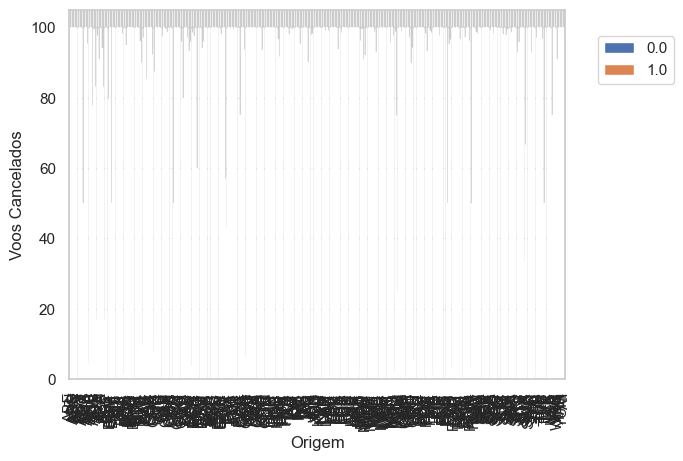

In [1368]:
# CRUZAMENTO DE QUALITATIVAS CM QUALITATIVAS
# FAZER TABELA DE FREQUENCIAS + GRÁFICOS DE BARRA
# PLOTAR UM AO LADO DO OUTRO SE POSSÍVEL
# Cia X Cancelados
cia_canc = pd.crosstab(Dados_gerais['OP_CARRIER'], Dados_gerais['CANCELLED'],  normalize='index', margins=True).round(3)*100
cia_canc__ordenado = cia_canc.sort_values(0.0)
print(display(cia_canc__ordenado.head(15)))
cia_canc.plot.bar()
plt.ylabel('Voos Cancelados')
plt.xlabel('Cia Aérea')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

# Destino X Cancelados
dest_canc = pd.crosstab(Dados_gerais['DEST'], Dados_gerais['CANCELLED'], normalize='index',margins=True).round(3)*100
dest_canc_ordenado = dest_canc.sort_values(0.0)
print(display(dest_canc_ordenado.head(35)))
dest_canc.plot.bar()
plt.ylabel('Voos Cancelados')
plt.xlabel('Destino')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

# Origem X Cancelados
org_canc = pd.crosstab(Dados_gerais['ORIGIN'], Dados_gerais['CANCELLED'], normalize='index',margins=True).round(3)*100
org_canc_ordenado = org_canc.sort_values(0.0)
print(display(org_canc_ordenado.head(35)))
org_canc.plot.bar()
plt.ylabel('Voos Cancelados')
plt.xlabel('Origem')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()



In [1369]:
# TESTE QUI-QUADRADO DE PEARSON - teste de independência entre variáveis ​​categóricas
# adotando alfa de significancia = 5% (0.05)
from scipy.stats import chi2_contingency
alpha = 0.05

# Dependendia do status do voo X CIA AREA 
stat, pcia, dof, expected = chi2_contingency(cia_canc)
print("p cia value is " + str(pcia))
if pcia <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independente da CIA aérea')

# Dependendia do status do voo X DESTINO
stat, pdest, dof, expected = chi2_contingency(dest_canc)
print("p dest value is " + str(pdest))
if pdest <= alpha:
    print('Destino é Dependente')
else:
    print('Independente do DESTINO')

# Dependendia do status do voo X ORIGEM
stat, porg, dof, expected = chi2_contingency(org_canc)
print("p dest value is " + str(porg))
if porg <= alpha:
    print('Dependente da Origem')
else:
    print('Independente da Origem')

p cia value is 0.048817492624558145
Dependent (reject H0)
p dest value is 0.0
Destino é Dependente
p dest value is 0.0
Dependente da Origem


MONTANDO O MODELO PREDITIVO
- aqui sim temos que dividir em uma parte de treinamento

In [1370]:
Dados_gerais_00 = Dados_gerais 
Dados_gerais = Dados_gerais_00.sample(frac = 0.1)
# Creating dataframe with
# rest of the 50% values
rest_Dados_gerais = Dados_gerais_00.drop(Dados_gerais.index)

In [1371]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

Dados_gerais = Dados_gerais.dropna()
Dados_gerais.head(5)

,OP_CARRIER,ORIGIN,DEST,CANCELLED,DISTANCE,Ano
797219,SkyWest Airlines,SFO,EGE,0.0,847.0,2019
1010226,United Airlines Cargo,ORD,BWI,0.0,621.0,2019
652976,American Airlines Cargo,CLT,MCI,0.0,808.0,2019
331563,Delta Air Lines,AUS,JFK,0.0,1521.0,2020
104865,JetBlue,BOS,PHL,0.0,280.0,2020


In [1372]:
cat_vars = ['OP_CARRIER','ORIGIN', 'DEST']
for var in cat_vars:
    cat_list = 'var' + '_' + var
    cat_list = pd.get_dummies(Dados_gerais[var],prefix = var)
    Dados_gerais = Dados_gerais.join(cat_list)
     
data_vars=Dados_gerais.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [1373]:
data_final=Dados_gerais[to_keep]
data_final.columns.values

array(['CANCELLED', 'DISTANCE', 'Ano', 'OP_CARRIER_ Endeavor',
       'OP_CARRIER_American Airlines Cargo', 'OP_CARRIER_Alaska Airlines',
       'OP_CARRIER_JetBlue', 'OP_CARRIER_Delta Air Lines',
       'OP_CARRIER_Atlatic Southeast Airlines',
       'OP_CARRIER_Frontier Flight', 'OP_CARRIER_Allegiant Air',
       'OP_CARRIER_Hawaiian Airlines', 'OP_CARRIER_Envoy Air',
       'OP_CARRIER_Spirit Airlines', 'OP_CARRIER_Comair Delta Connection',
       'OP_CARRIER_SkyWest Airlines', 'OP_CARRIER_United Airlines Cargo',
       'OP_CARRIER_Southwest Airlines', 'OP_CARRIER_Mesa Airlines',
       'OP_CARRIER_Midwest Airlines', 'ORIGIN_ABE', 'ORIGIN_ABI',
       'ORIGIN_ABQ', 'ORIGIN_ABR', 'ORIGIN_ABY', 'ORIGIN_ACT',
       'ORIGIN_ACV', 'ORIGIN_ACY', 'ORIGIN_ADK', 'ORIGIN_ADQ',
       'ORIGIN_AEX', 'ORIGIN_AGS', 'ORIGIN_ALB', 'ORIGIN_ALO',
       'ORIGIN_AMA', 'ORIGIN_ANC', 'ORIGIN_APN', 'ORIGIN_ART',
       'ORIGIN_ASE', 'ORIGIN_ATL', 'ORIGIN_ATW', 'ORIGIN_ATY',
       'ORIGIN_AUS', 'ORIGIN_

In [1374]:
data_final

,CANCELLED,DISTANCE,Ano,OP_CARRIER_ Endeavor,OP_CARRIER_American Airlines Cargo,OP_CARRIER_Alaska Airlines,OP_CARRIER_JetBlue,OP_CARRIER_Delta Air Lines,OP_CARRIER_Atlatic Southeast Airlines,OP_CARRIER_Frontier Flight,...,DEST_UIN,DEST_USA,DEST_VEL,DEST_VLD,DEST_VPS,DEST_WRG,DEST_XNA,DEST_XWA,DEST_YAK,DEST_YUM
797219,0.0,847.0,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1010226,0.0,621.0,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
652976,0.0,808.0,2019,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
331563,0.0,1521.0,2020,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
104865,0.0,280.0,2020,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313234,0.0,1363.0,2020,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
309856,0.0,236.0,2020,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1134870,0.0,692.0,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
895054,0.0,249.0,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1375]:
linhas = len(data_final)
col=len(data_final.columns)
b=0
while b < col:
    nome = data_final.columns[b]
    a = 0
    sum = 0
    while a<linhas:
        sum+=data_final.iloc[a,b]
        a+=1
    if sum == 0 and nome!= "CANCELLED":
        data_final = data_final.drop(nome, axis=1)
        col +=-1
    b+=1
data_sem_zero = data_final

In [1376]:
data_final=data_sem_zero
data_final

,CANCELLED,DISTANCE,Ano,OP_CARRIER_ Endeavor,OP_CARRIER_American Airlines Cargo,OP_CARRIER_Alaska Airlines,OP_CARRIER_JetBlue,OP_CARRIER_Delta Air Lines,OP_CARRIER_Atlatic Southeast Airlines,OP_CARRIER_Frontier Flight,...,DEST_TUL,DEST_TUS,DEST_TWF,DEST_TYR,DEST_TYS,DEST_USA,DEST_VLD,DEST_WRG,DEST_XWA,DEST_YUM
797219,0.0,847.0,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1010226,0.0,621.0,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
652976,0.0,808.0,2019,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
331563,0.0,1521.0,2020,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
104865,0.0,280.0,2020,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313234,0.0,1363.0,2020,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
309856,0.0,236.0,2020,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1134870,0.0,692.0,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
895054,0.0,249.0,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1377]:
X = data_final.loc[:, data_final.columns != 'CANCELLED']
y = data_final.loc[:, data_final.columns == 'CANCELLED']

In [1378]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y= os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['CANCELLED'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['CANCELLED']==0]))
print("Number of subscription",len(os_data_y[os_data_y['CANCELLED']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['CANCELLED']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['CANCELLED']==1])/len(os_data_X))

length of oversampled data is  1632
Number of no subscription in oversampled data 816
Number of subscription 816
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [1379]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, step = 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

c:\Users\renat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\renat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False False False
 False False False  True  True False  True False  True False  True  True
 False False False False False  True False False  True  True  True False
  True False False  True False  True  True  True  True  True False False
  True  True False False False  True  True  True False False False False
  True False False  True False  True  True  True False  True  True  True
 False  True False  True False False  True  True  True False False  True
 False False False False  True False False False False False  True  True
 False False False False False False  True  True  True False False  True
  True  True  True False  True False  True  True False  True  True  True
 False False  True False  True  True  True False  True  True  True False
  True False False False False False False  True  True  True  True  True
 False False False False  True False False False Fa

c:\Users\renat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\renat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [1380]:
Name_list=[]
for i in range(len(rfe.support_)):
    teste = rfe.support_[i]
    nome = data_final.columns[i]
    if teste == True:
        Name_list.append(nome)
X=os_data_X[Name_list]
y=os_data_y['CANCELLED']

In [1381]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit(method='bfgs')
print(result.summary2())

         Current function value: 0.122450
         Iterations: 35
         Function evaluations: 49
         Gradient evaluations: 49
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.823      
Dependent Variable:      CANCELLED            AIC:                  741.6764   
Date:                    2022-11-28 08:24     BIC:                  1664.6594  
No. Observations:        1632                 Log-Likelihood:       -199.84    
Df Model:                170                  LL-Null:              -1131.2    
Df Residuals:            1461                 LLR p-value:          2.7218e-282
Converged:               0.0000               Scale:                1.0000     
-------------------------------------------------------------------------------
                                       Coef.   Std.Err.  z  P>|z| [0.025 0.975]
-------------------------------------------------------------------------------
Ano                

c:\Users\renat\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
c:\Users\renat\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [1382]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


In [1383]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
certos=confusion_matrix[0][0]+confusion_matrix[1][1]
errados=confusion_matrix[0][1]+confusion_matrix[1][0]
print(confusion_matrix)

print(f'Temos {certos} predições certas')
print(f'Temos {errados} predições erradas')

[[233   9]
 [ 15 233]]
Temos 466 predições certas
Temos 24 predições erradas


In [1384]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       242
         1.0       0.96      0.94      0.95       248

    accuracy                           0.95       490
   macro avg       0.95      0.95      0.95       490
weighted avg       0.95      0.95      0.95       490



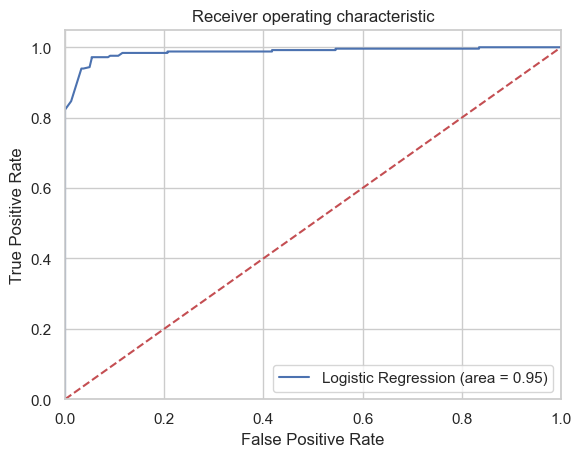

In [1385]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

MODELO DE PREDIÇÃO - RESULTADOS

VALIDAÇÃO DOS RESULTADOS

In [1386]:
# código de validação de resultados 